<a href="https://colab.research.google.com/github/sasikarur/ML_Projects/blob/main/E_commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary dependencies

In [ ]:
!pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [85]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [86]:
# Try reading the CSV file with 'latin1' encoding
df = pd.read_csv('E-commerce_customer_segmentation.csv', encoding='latin1')
pd.set_option('display.max_columns', None)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [87]:
df.shape

(541909, 8)

In [88]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [89]:
df.columns = [column.lower() for column in df.columns]

In [90]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [91]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Checking and Handling Missing Values

In [93]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [94]:
# filling the missing values using statistical techniques
df = df.fillna({'description': st.mode(df['description']),
                'customerid': st.mode(df['customerid'])})

In [95]:
# cross  checking  for  null  values
df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

# Data Type Correction

In [96]:
df.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

In [97]:
df['customerid'] = df['customerid'].astype(int)
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [98]:
# cross-checking the data-types of all the columns in the dataframe
df.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid              int64
country                object
dtype: object

# Creation of a new column "Total_sales":

Quantity * Unit Price = Total sales

In [99]:
df['total_sales'] = df['quantity'] * df['unitprice']

In [100]:
df['total_sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: total_sales, Length: 541909, dtype: float64

In [101]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [102]:
df.shape

(541909, 9)

In [103]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'total_sales'],
      dtype='object')

# Drop Duplicates

In [104]:
df = df.drop_duplicates()

In [105]:
df.shape

(536641, 9)

In [106]:
df.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid              int64
country                object
total_sales           float64
dtype: object

# Data Visualization

In [ ]:
#Boxplot – All Numeric Variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7b4c2cc75510>,
 'caps': [<matplotlib.lines.Line2D at 0x7b4c2cc74280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b4c2cc775b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7b4c2cc74460>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b4c2cc760e0>,
 'means': []}

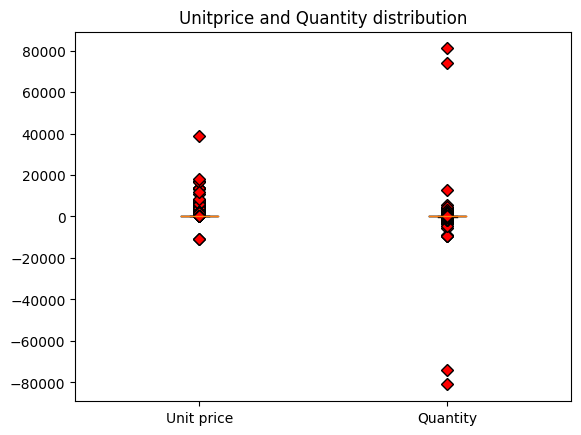

In [ ]:
data = df[['unitprice','quantity']]

red_diamond = dict(markerfacecolor='r', marker='D')

plt.title("Unitprice and Quantity distribution")
plt.boxplot(data.values, labels=["Unit price","Quantity"],flierprops = red_diamond)

In [ ]:
#Histogram – All Numeric Variables

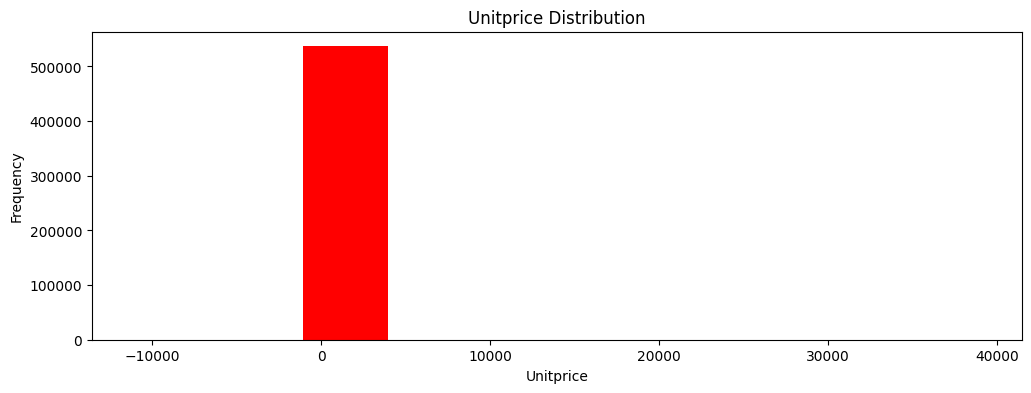

In [108]:

plt.figure(figsize=(12,4))

plt.title("Unitprice Distribution")

plt.xlabel("Unitprice")
plt.ylabel("Frequency")

plt.hist(df['unitprice'],color='r')
plt.show()

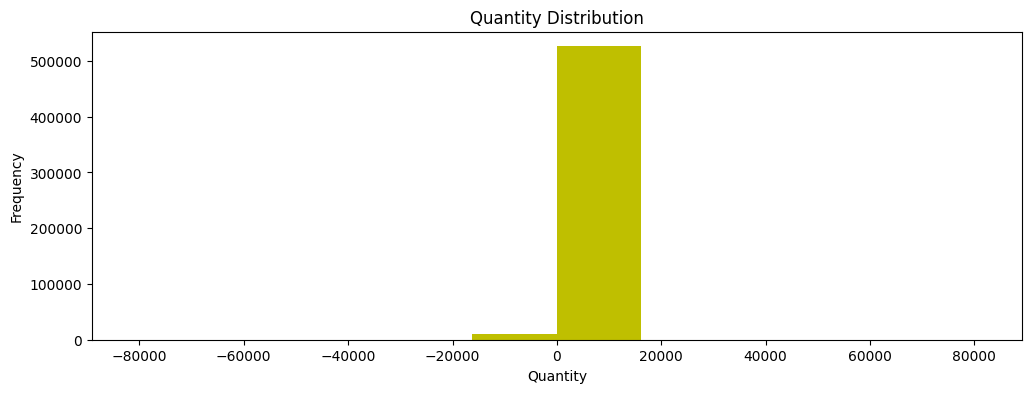

In [109]:
plt.figure(figsize=(12,4))

plt.title("Quantity Distribution")

plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.hist(df['quantity'],color='y')
plt.show()


In [ ]:
#Distribution Plot – All Numeric Variables

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='unitprice', ylabel='Density'>

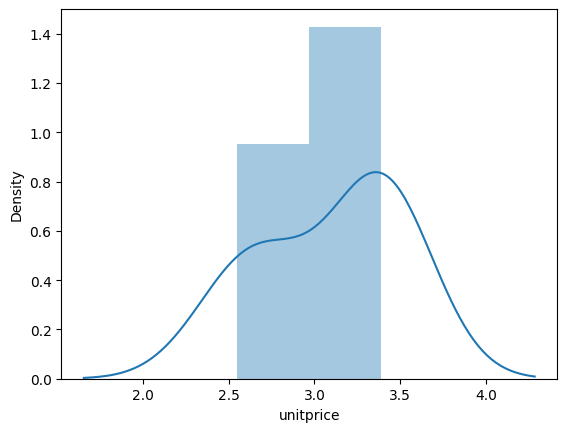

In [111]:
sns.distplot((df.head()['unitprice']))

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='quantity', ylabel='Density'>

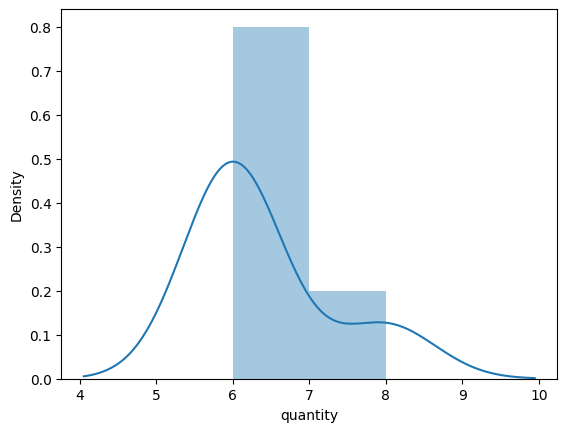

In [112]:
sns.distplot((df.head()['quantity']))

In [ ]:
#Bar Plot – Every Categorical Variable vs every Numerical Variable

In [115]:
df.groupby('country')['quantity'].mean()

country
Australia               66.488871
Austria                 12.037406
Bahrain                 13.684211
Belgium                 11.189947
Brazil                  11.125000
Canada                  18.298013
Channel Islands         12.513871
Cyprus                  10.304419
Czech Republic          19.733333
Denmark                 21.048843
EIRE                    17.411413
European Community       8.147541
Finland                 15.346763
France                  12.930336
Germany                 12.377743
Greece                  10.657534
Hong Kong               16.580986
Iceland                 13.505495
Israel                  14.795918
Italy                    9.961395
Japan                   70.441341
Lebanon                  8.577778
Lithuania               18.628571
Malta                    7.433071
Netherlands             84.406580
Norway                  17.722836
Poland                  10.712610
Portugal                10.697351
RSA                      6.068966
Saudi 

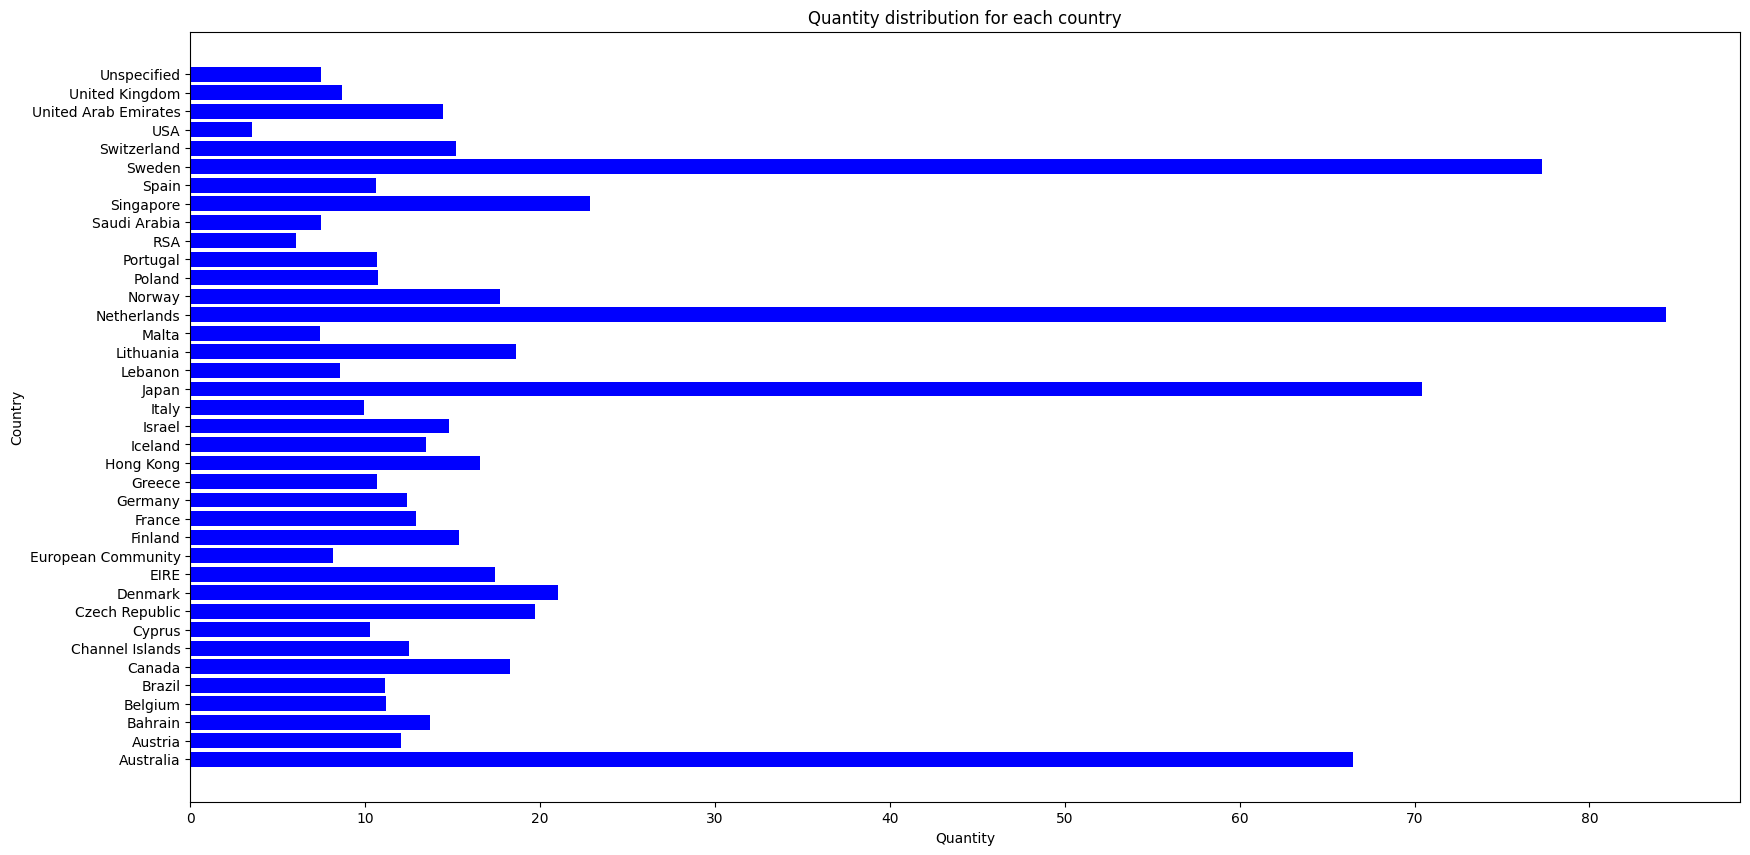

In [117]:
data_country_quantity = df.groupby('country')['quantity'].mean()

x = data_country_quantity.values.tolist()
y = data_country_quantity.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Quantity")
plt.ylabel("Country")

plt.title("Quantity distribution for each country")

plt.barh(y,x,color=['b'])
plt.show()

In [118]:
df.groupby('country')['unitprice'].mean()

country
Australia                 3.217806
Austria                   4.243192
Bahrain                   4.556316
Belgium                   3.644335
Brazil                    4.456250
Canada                    6.030331
Channel Islands           4.936460
Cyprus                    6.350311
Czech Republic            2.938333
Denmark                   3.256941
EIRE                      5.914024
European Community        4.820492
Finland                   5.448705
France                    5.032898
Germany                   3.969772
Greece                    4.885548
Hong Kong                43.043662
Iceland                   2.644011
Israel                    3.650306
Italy                     4.831121
Japan                     2.276145
Lebanon                   5.387556
Lithuania                 2.841143
Malta                     5.244173
Netherlands               2.738317
Norway                    6.012026
Poland                    4.170880
Portugal                  8.616510
RSA         

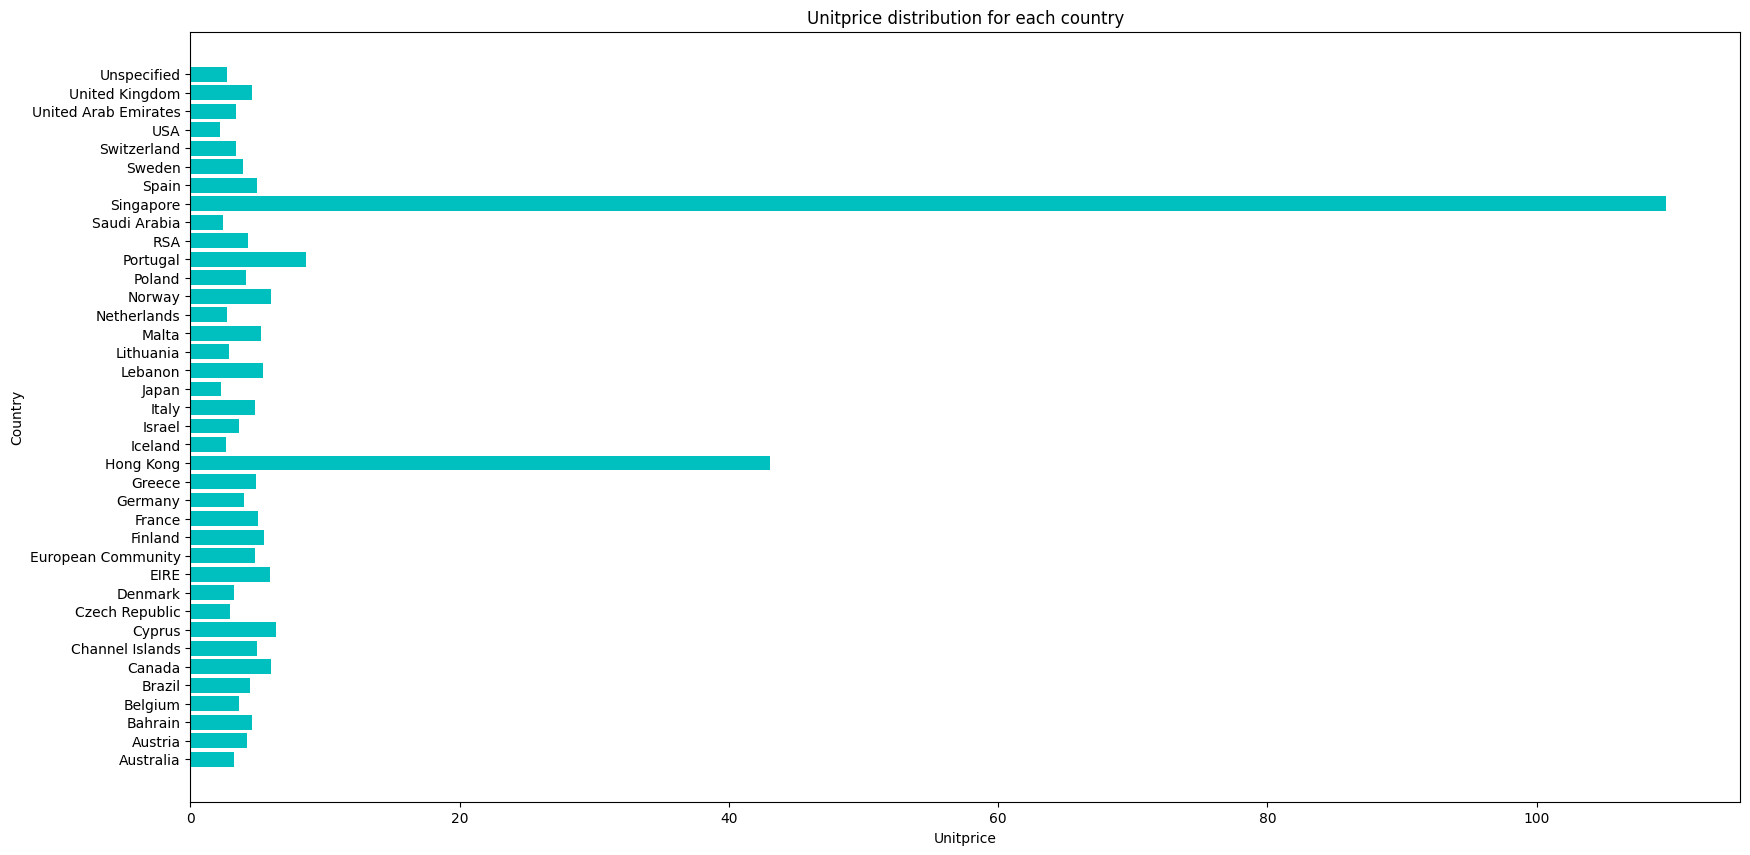

In [119]:
data_country_unitprice = df.groupby('country')['unitprice'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Unitprice")
plt.ylabel("Country")

plt.title("Unitprice distribution for each country")

plt.barh(y,x,color=['c'])
plt.show()

In [120]:
df.groupby('country')['customerid'].mean()

country
Australia               12464.682830
Austria                 12521.451372
Bahrain                 12932.052632
Belgium                 12430.298695
Brazil                  12769.000000
Canada                  17321.079470
Channel Islands         14888.096433
Cyprus                  12405.394435
Czech Republic          12781.000000
Denmark                 12536.591260
EIRE                    15016.578568
European Community      15108.000000
Finland                 12517.012950
France                  12717.408383
Germany                 12645.770253
Greece                  13757.424658
Hong Kong               17841.000000
Iceland                 12347.000000
Israel                  13487.952381
Italy                   12648.397260
Japan                   12757.798883
Lebanon                 12764.000000
Lithuania               15332.000000
Malta                   16996.031496
Netherlands             14420.302826
Norway                  12437.984346
Poland                  12733.

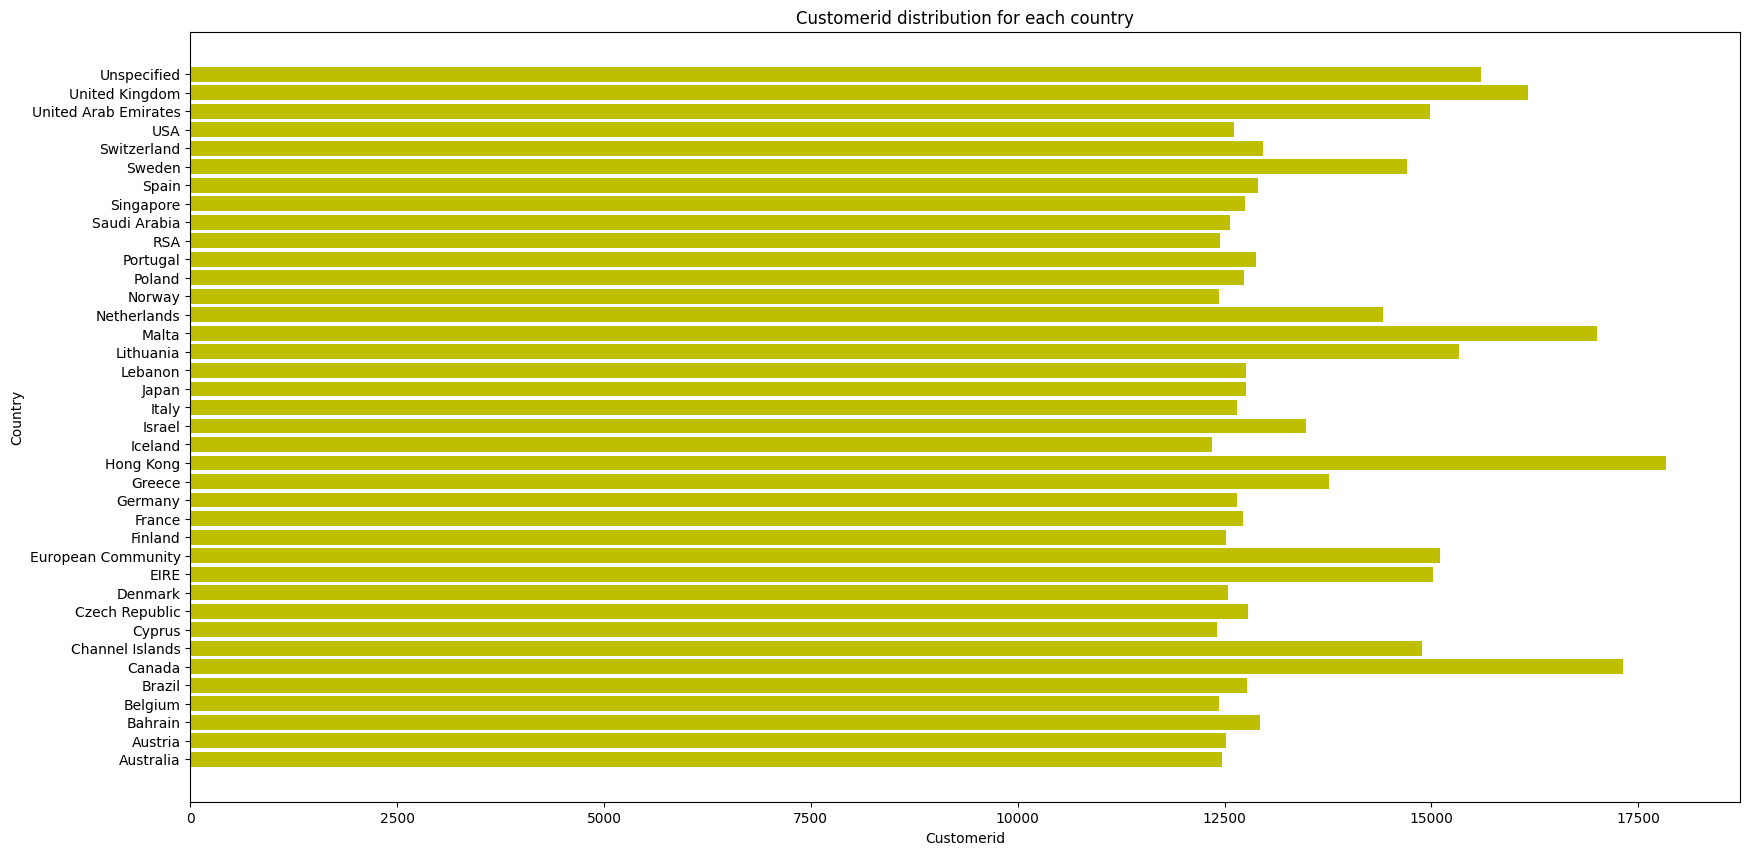

In [121]:
data_country_unitprice = df.groupby('country')['customerid'].mean()

x = data_country_unitprice.values.tolist()
y = data_country_unitprice.index.tolist()

plt.figure(figsize=(20,10))

plt.xlabel("Customerid")
plt.ylabel("Country")

plt.title("Customerid distribution for each country")

plt.barh(y,x,color=['y'])
plt.show()

In [ ]:
#Line chart to show the trend of data - All Numeric/Date Variables

<Axes: xlabel='quantity', ylabel='unitprice'>

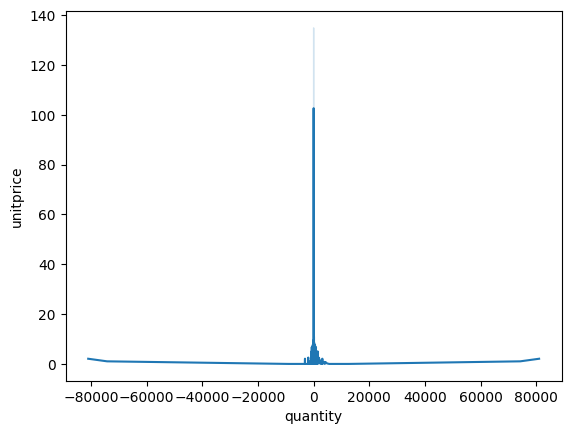

In [122]:
sns.lineplot(data=df, x="quantity",y="unitprice")

<Axes: xlabel='country', ylabel='unitprice'>

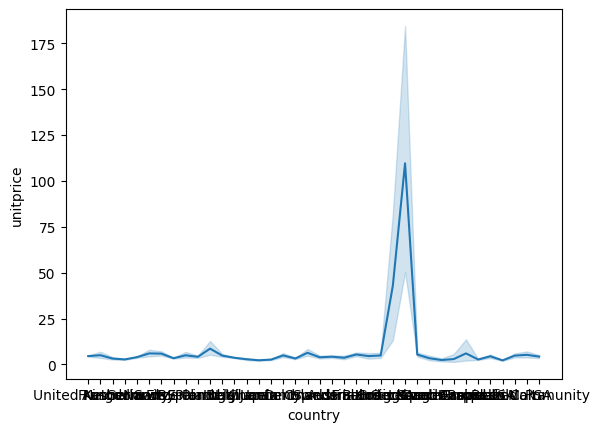

In [123]:
sns.lineplot(data=df, x="country", y="unitprice")

<Axes: xlabel='customerid', ylabel='unitprice'>

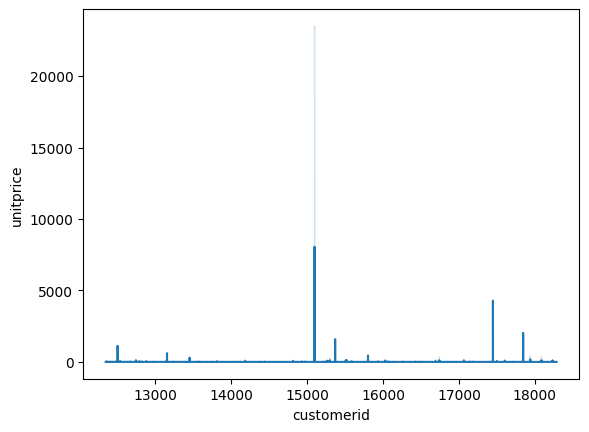

In [124]:
sns.lineplot(data=df, x="customerid", y="unitprice")

# NLP for Product Similarity

In [126]:
#Grouping by Customers

In [127]:
customer_data = df.groupby('customerid').agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'description': lambda x: ' '.join(x),
}).reset_index()

In [128]:
customer_data

,customerid,total_sales,quantity,description
0,12346,0.00,0,MEDIUM CERAMIC TOP STORAGE JAR MEDIUM CERAMIC ...
1,12347,4310.00,2458,BLACK CANDELABRA T-LIGHT HOLDER AIRLINE BAG VI...
2,12348,1797.24,2341,72 SWEETHEART FAIRY CAKE CASES 60 CAKE CASES D...
3,12349,1757.55,631,PARISIENNE CURIO CABINET SWEETHEART WALL TIDY ...
4,12350,334.40,197,CHOCOLATE THIS WAY METAL SIGN METAL SIGN NEIGH...
...,...,...,...,...
4367,18280,180.60,45,WOOD BLACK BOARD ANT WHITE FINISH RETROSPOT LA...
4368,18281,80.82,54,ROBOT BIRTHDAY CARD CARD CIRCUS PARADE PENNY F...
4369,18282,176.60,98,ANTIQUE CREAM CUTLERY CUPBOARD FRENCH STYLE ST...
4370,18283,2045.53,1357,CHARLOTTE BAG PINK POLKADOT LUNCH BAG WOODLAND...


In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
product_matrix = tfidf.fit_transform(customer_data['description'])

In [131]:
from sklearn.cluster import KMeans

combined_features = pd.concat([customer_data[['total_sales', 'quantity']], pd.DataFrame(product_matrix.toarray())], axis=1)
combined_features = combined_features.to_numpy()

kmeans = KMeans(n_clusters=5)
customer_data['cluster'] = kmeans.fit_predict(combined_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [133]:
cluster_profiles = customer_data.groupby('cluster').agg({
    'total_sales': 'mean',
    'quantity': 'mean',
}).reset_index()

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

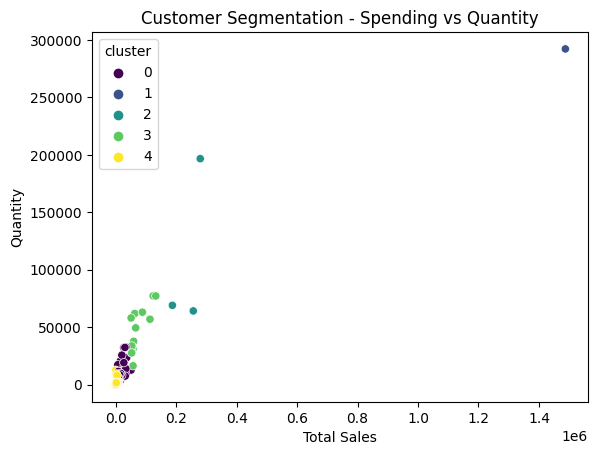

In [135]:
sns.scatterplot(data=customer_data, x='total_sales', y='quantity', hue='cluster', palette='viridis')
plt.title('Customer Segmentation - Spending vs Quantity')
plt.xlabel('Total Sales')
plt.ylabel('Quantity')
plt.show()

In [136]:
for cluster, data in customer_data.groupby('cluster'):
    if cluster == 0:
        # Marketing strategy for cluster 0
        print("Marketing strategy for Cluster 0: High spenders, low quantity")
    elif cluster == 1:
        # Marketing strategy for cluster 1
        print("Marketing strategy for Cluster 1: Medium spenders, medium quantity")


Marketing strategy for Cluster 0: High spenders, low quantity
Marketing strategy for Cluster 1: Medium spenders, medium quantity


In [137]:
for cluster, data in customer_data.groupby('cluster'):
    if cluster == 0:
        # Implement strategy A for cluster 0
        print("Implementing Strategy A for Cluster 0")
        # Monitor results and gather feedback
    elif cluster == 1:
        # Implement strategy B for cluster 1
        print("Implementing Strategy B for Cluster 1")

Implementing Strategy A for Cluster 0
Implementing Strategy B for Cluster 1


In [138]:
for cluster, data in customer_data.groupby('cluster'):
    if cluster == 0:
        # Personalization for cluster 0
        print("Personalized content for Cluster 0")
        # Implement personalized content for this cluster
    elif cluster == 1:
        # Personalization for cluster 1
        print("Personalized content for Cluster 1")

Personalized content for Cluster 0
Personalized content for Cluster 1


In [ ]:
#Histogram of Total Sales:

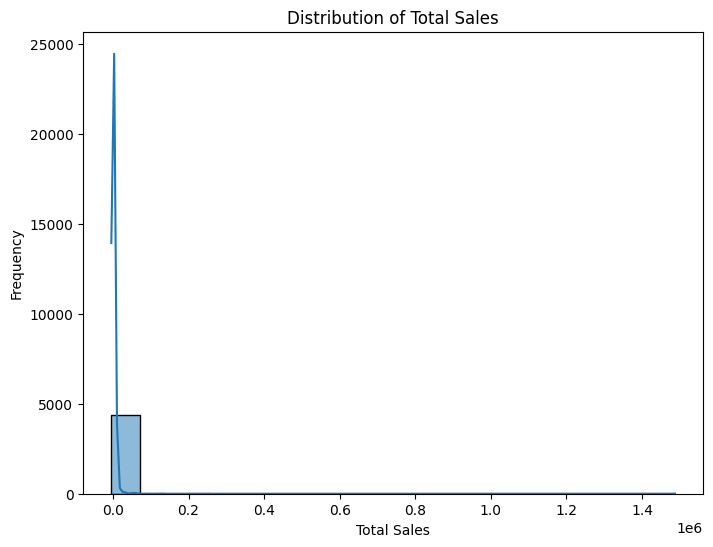

In [139]:
plt.figure(figsize=(8, 6))
sns.histplot(customer_data, x='total_sales', bins=20, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

In [140]:
#Bar Plot for Purchase Frequency by Cluster:

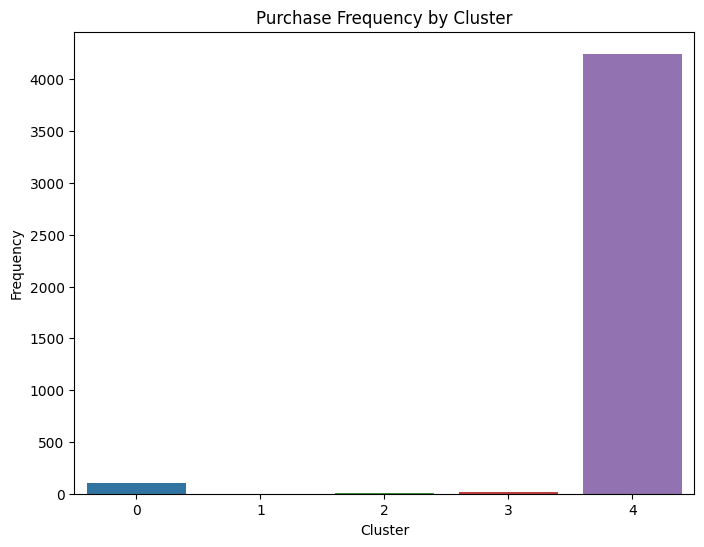

In [141]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_data, x='cluster')
plt.title('Purchase Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()


In [142]:
#Box Plot for Quantity by Cluster:

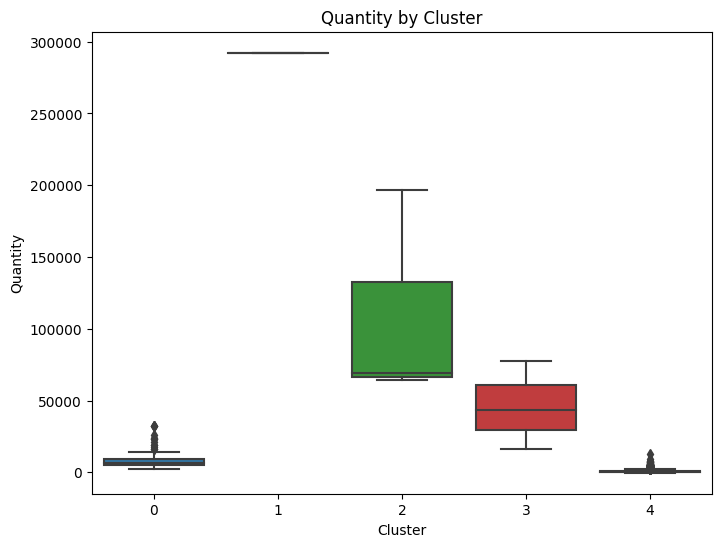

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='cluster', y='quantity')
plt.title('Quantity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.show()


In [145]:
#Customer Distribution by Country:

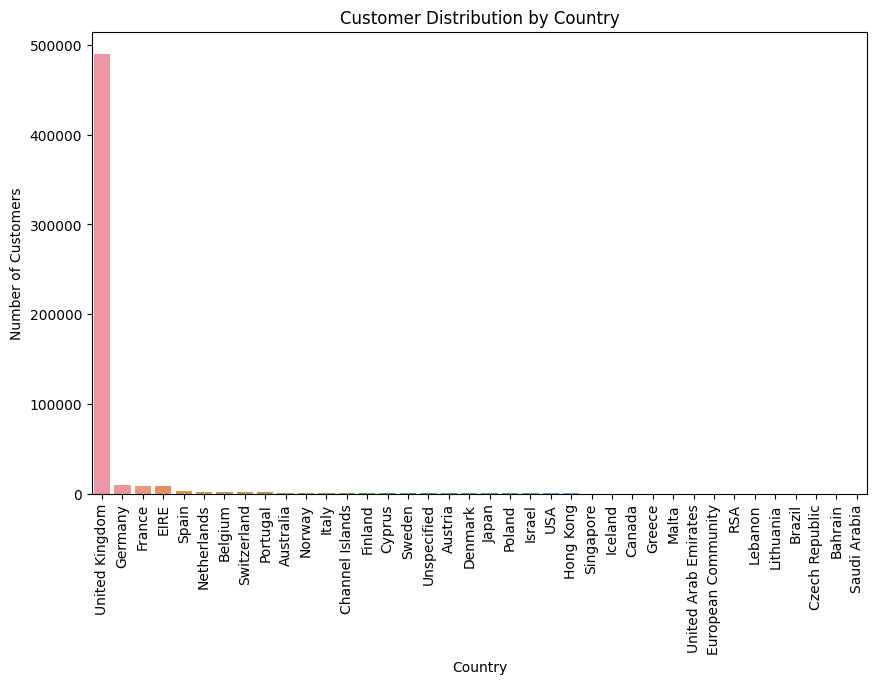

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Customer Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()


In [147]:
#Heatmap for Correlation between Variables:

<ipython-input-148-8f12bd3ac750>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_data.corr()


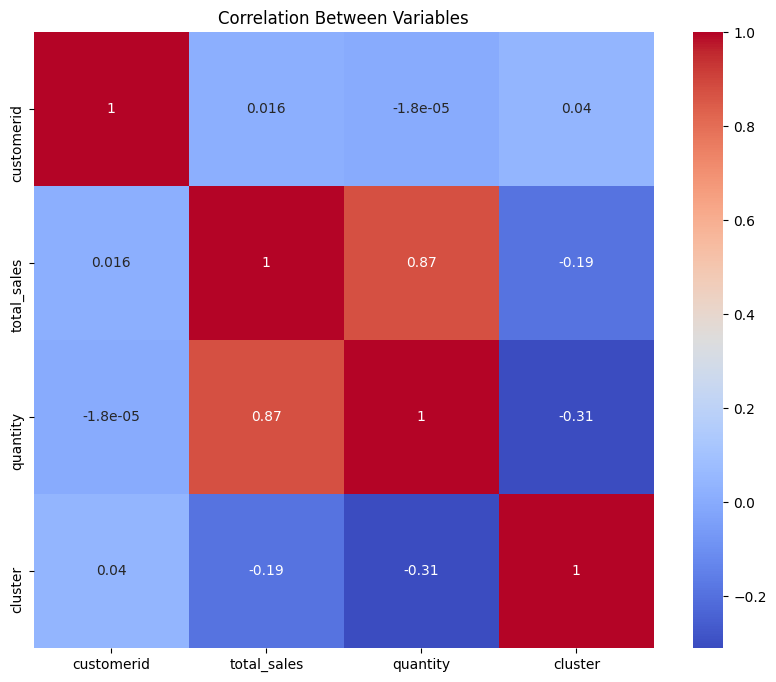

In [148]:
plt.figure(figsize=(10, 8))
correlation_matrix = customer_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


In [149]:
#orders made by the customers

In [152]:
df.groupby(by=['customerid','country'], as_index=False)['quantity'].count().head()

,customerid,country,quantity
0,12346,United Kingdom,2
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


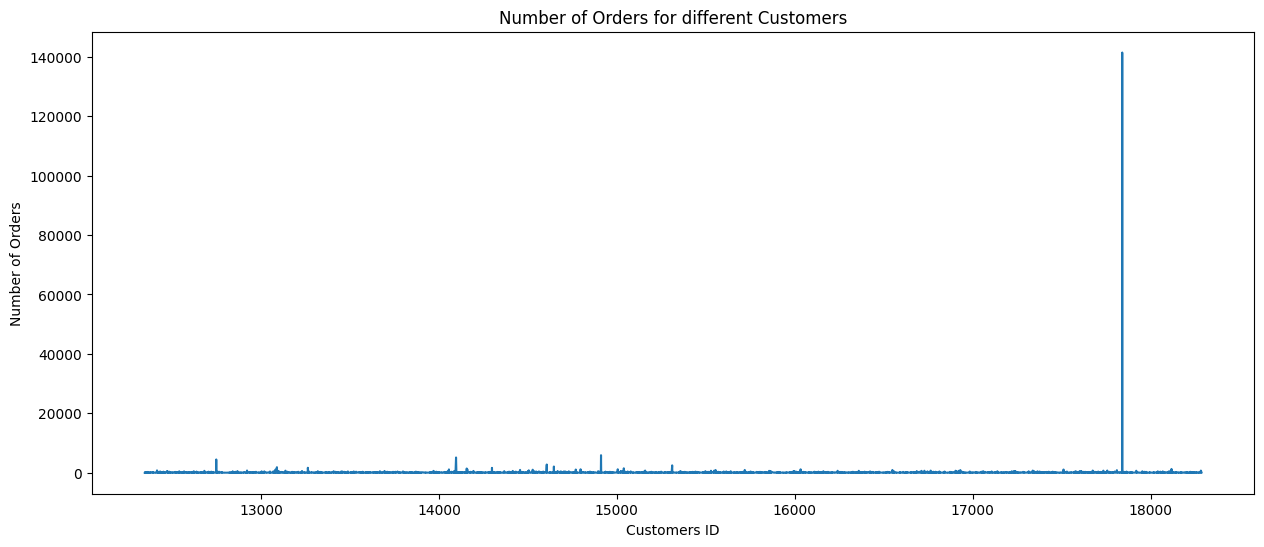

In [154]:
orders = df.groupby(by=['customerid','country'], as_index=False)['quantity'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.customerid, orders.quantity)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [155]:
#TOP 5 customers with higher number of orders

In [157]:
print("Top 5 customers with highest number of orders are : ")
orders.sort_values(by='quantity', ascending=False).head()


Top 5 customers with highest number of orders are : 


,customerid,country,quantity
4057,17841,United Kingdom,141384
1903,14911,EIRE,5898
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4459
1682,14606,United Kingdom,2759


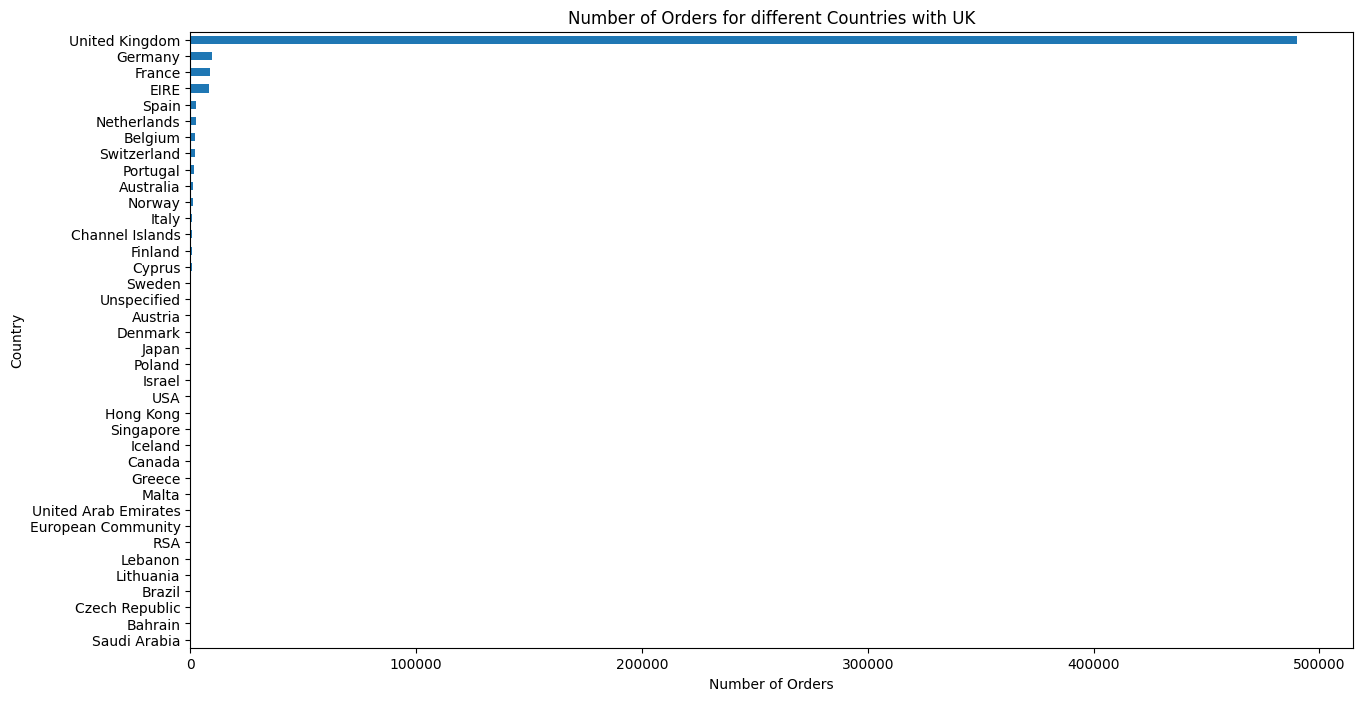

In [158]:
group_country_orders = df.groupby('country')['invoiceno'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries with UK')
plt.show()

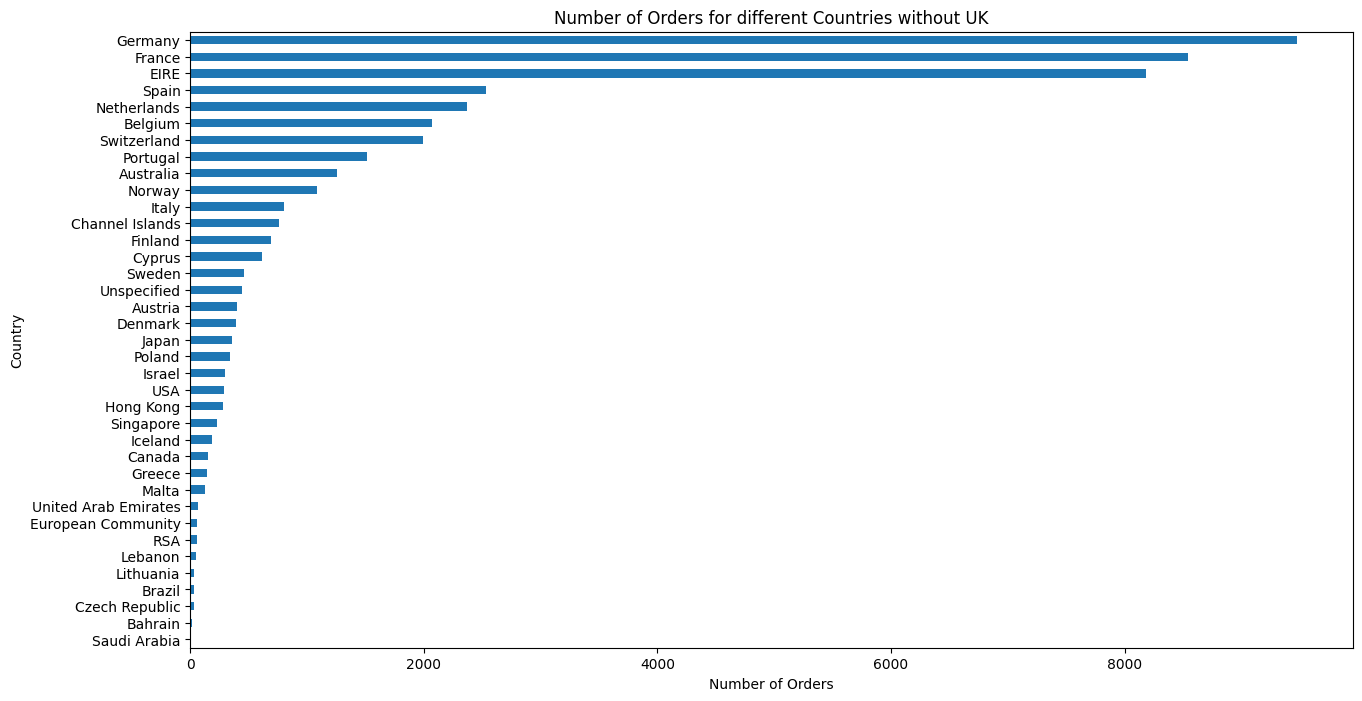

In [159]:
group_country_orders = df.groupby('country')['invoiceno'].count().sort_values()

del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries without UK')
plt.show()